[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
C:\Users\Consultant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


sum of Null Values : content    0
rating     0
dtype: int64
5.0    3324
1.0    1108
4.0     554
2.0     554
Name: reviews.rating, dtype: int64


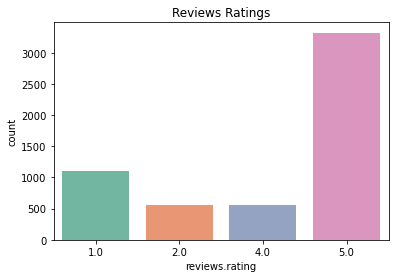

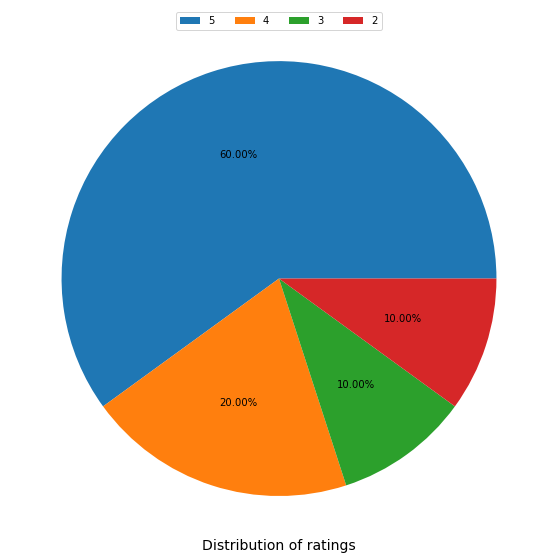

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


1    3878
0    1662
Name: sentiment, dtype: int64


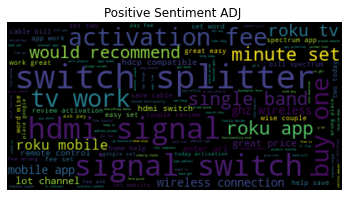

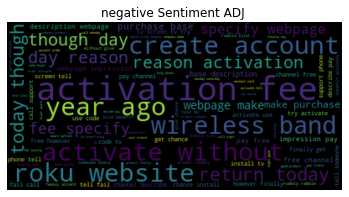

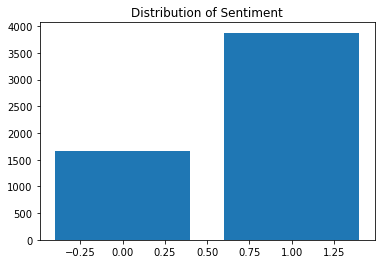

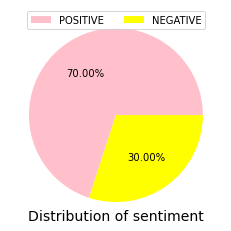

[[357   0]
 [  0 853]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       853

    accuracy                           1.00      1210
   macro avg       1.00      1.00      1.00      1210
weighted avg       1.00      1.00      1.00      1210

1.0


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer



nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

url = 'data.csv'
df1 = pd.read_csv(url,encoding = 'unicode_escape')

review=pd.DataFrame(df1.groupby('rating').size().sort_values(ascending=False).rename('No of Users').reset_index())

df1.drop(["variant","date","title",'images','author','product','url','verified'], axis=1, inplace=True)

data = df1.dropna()

print ("sum of Null Values : " +str(data.isnull().sum()))

review = data.rename(columns={"content":"reviews.text","rating":"reviews.rating"})

print (review['reviews.rating'].value_counts())


sns.countplot(review['reviews.rating'],palette ='Set2')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.title("Reviews Ratings")
plt.savefig("data/reviews ratings.png")
plt.show()


plt.figure(figsize = (10, 10))
label=[5,4,3,2,1,'Missing']
plt.pie(review['reviews.rating'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of ratings', size=14, y=-0.01)
plt.show()
plt.savefig("data/distribution of ratings.png")

def cleanstr(text):
    text=text.lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text

def remove_stopwords(stmt):
    filtered_sentence = []
    stmt=stmt.lower()
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in suitable_stopwords:
            if w not in replace_list:
                filtered_sentence.append(w)
            else:
                filtered_sentence.append(w+' not')
    return " ".join(filtered_sentence)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.ADJ
    

def lemmatize(text):
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    word_pos_tags = nltk.pos_tag(words)
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))
    return " ".join(lemmatized_sentence)



nltk.download('omw-1.4')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')



words = pd.Series(' '.join(review['reviews.text']).split())
words

stopword_list = stopwords.words('english')
suitable_stopwords=[]
l =["n'",'nor','no','not']
for i in stopword_list:
    if not any(words in i for words in l):
        suitable_stopwords.append(i)


suitable_stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you','' "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should','play','playing','tablet','use','get','kindel','read','book','device','year','time','want', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
replace_list=['ain','hate','bad','worse', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"]


review['text']=review['reviews.text'].apply(cleanstr)

review['text']=review['text'].apply(remove_stopwords)

review['text']=review['text'].apply(lemmatize)

sentiment = {1: 0,2: 0,3: 0,4: 1,5: 1}

review['sentiment']=review['reviews.rating'].map(sentiment)


positive = review[review['sentiment'] == 1]
negative = review[review['sentiment'] == 0]



print (review['sentiment'].value_counts())


pos = " ".join(review for review in positive.text)
wordcloud2 = WordCloud(stopwords=suitable_stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment ADJ ")
plt.savefig('positivewordcloud33.png')
plt.show()

neg = " ".join(review for review in negative.text)
wordcloud3 = WordCloud(stopwords=replace_list).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.title("negative Sentiment ADJ ")
plt.savefig('negative wordcloud33.png')
plt.show()




        
        

sentiment = {1: 0,2: 0,3: 2,4: 1,5: 1}
review['sentiment']=review['reviews.rating'].map(sentiment)

counts=review['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.title("Distribution of Sentiment")
plt.savefig("data/distribution of sentiment.png")
plt.show()

labels = ['POSITIVE', 'NEGATIVE']
colors = ['Pink', 'Yellow']
plt.pie(review['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=3, loc=9)
plt.savefig("data/distribution sentiment piechar.png")
plt.show()





index = review.index
review['random_number'] = np.random.randn(len(index))
train = review[review['random_number'] <= 0.8]
test = review[review['random_number'] > 0.8]


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

tfidf = TfidfVectorizer()
train_matrix = tfidf.fit_transform(train['text'])
test_matrix = tfidf.transform(test['text'])
        
clf = LinearSVC()

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

clf.fit(X_train,y_train)

predictions = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print ( clf.score(X_train, y_train))

